![Logo UFC](../3-imagens/UFC.png)


# Universidade Federal do Ceará  
## Departamento de Computação  

---

### Disciplina: **Métodos Numéricos**  
**Professor:** João Paulo do Vale Madeiro  

---

### **Alunos:**
- Lucas de Oliveira Sobral, 556944
- Mateus Andrade Maia, 552593

Link para vídeo de apresentação: https://youtu.be/rTRhtJ6lVYw


# TRABALHO COMPUTACIONAL 2

# Resumo Teórico

## Spline Quadrático

O spline quadrático utiliza **polinômios de grau 2** (parábolas) para interpolar pontos em intervalos sucessivos.

### Forma geral em cada intervalo \([x_i, x_{i+1}]\):

$$
S_i(x) = a_i + b_i (x - x_i) + c_i (x - x_i)^2
$$

### Condições impostas:

1. **Interpolação dos pontos**:
$$
S_i(x_i) = y_i \quad \text{e} \quad S_i(x_{i+1}) = y_{i+1}
$$

2. **Continuidade da primeira derivada** nos pontos internos:
$$
S'_i(x_{i+1}) = S'_{i+1}(x_{i+1})
$$

3. **Condição extra** (necessária para fechar o sistema):
$$
c_0 = 0 \quad \text{ou} \quad S_0'(x_0) \text{ conhecido}
$$

### Características:
- Contínuo na função e na primeira derivada.
- Segunda derivada pode ser descontínua.
- Mais suave que o spline linear, mas menos suave que o cúbico.


## Spline Cúbico

O spline cúbico utiliza **polinômios de grau 3** para garantir suavidade até a segunda derivada.

### Forma geral em cada intervalo \([x_i, x_{i+1}]\):

$$
S_i(x) = a_i + b_i (x-x_i) + c_i (x-x_i)^2 + d_i (x-x_i)^3
$$

### Condições impostas:

1. **Interpolação dos pontos**:
$$
S_i(x_i) = y_i \quad \text{e} \quad S_i(x_{i+1}) = y_{i+1}
$$

2. **Continuidade da 1ª derivada**:
$$
S'_i(x_{i+1}) = S'_{i+1}(x_{i+1})
$$

3. **Continuidade da 2ª derivada**:
$$
S''_i(x_{i+1}) = S''_{i+1}(x_{i+1})
$$

4. **Condições de contorno naturais**:
$$
S''_0(x_0) = 0 \quad \text{e} \quad S''_{n-1}(x_n) = 0
$$

### Sistema tridiagonal para segundas derivadas \(M_i\):

$$
\frac{h_{i-1}}{6} M_{i-1} + \frac{h_{i-1}+h_i}{3} M_i + \frac{h_i}{6} M_{i+1} =
\frac{y_{i+1}-y_i}{h_i} - \frac{y_i-y_{i-1}}{h_{i-1}}
$$

onde \( h_i = x_{i+1}-x_i \).

### Fórmula final para cada intervalo:

$$
S_i(x) = \frac{M_{i+1}}{6h_i}(x-x_i)^3 +
\frac{M_i}{6h_i}(x_{i+1}-x)^3 +
\left(\frac{y_{i+1}}{h_i} - \frac{M_{i+1} h_i}{6}\right)(x-x_i) +
\left(\frac{y_i}{h_i} - \frac{M_i h_i}{6}\right)(x_{i+1}-x)
$$

### Características:
- Contínuo na função, 1ª e 2ª derivadas.
- Curva extremamente suave e estável.
- Método mais usado em aplicações científicas e gráficas.

### 1) Considere os dados abaixo

![Questão 1](../3-imagens/questao1.png)


(a)Obter e plotar o gráfico da spline quadrática que passa pelos pontos dados;





In [1]:
"Importando as bibliotecas básicas"
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Implementação do metodo de Gauss

In [2]:
def subs_retroativas_np(A, b):
    n = len(A)
    x = np.zeros(n, dtype=float)
    for i in range(n - 1, -1, -1):
        soma = A[i, i + 1:] @ x[i + 1:]
        x[i] = (b[i] - soma) / A[i, i]
    return x

In [3]:
def gauss_np(A, b):
    A = A.copy().astype(float)
    b = b.copy().astype(float)
    n = len(A)

    for k in range(n - 1):
        # --- Início do Pivoteamento Parcial ---
        max_row_idx = k + np.argmax(np.abs(A[k:, k]))
        if abs(A[max_row_idx, k]) < 1e-12:
            return None
        if max_row_idx != k:
            A[[k, max_row_idx]] = A[[max_row_idx, k]]
            b[[k, max_row_idx]] = b[[max_row_idx, k]]
        # --- Fim do Pivoteamento ---

        for i in range(k + 1, n):
            m = A[i, k] / A[k, k]
            A[i, k:] -= m * A[k, k:]
            b[i] -= m * b[k]

    if abs(A[n-1, n-1]) < 1e-12:
        return None

    return subs_retroativas_np(A, b)

# Implementação Spline Quadrática

In [4]:
def quadratic_spline_coeffs(x_points, y_points):
    n = len(x_points) - 1
    A = np.zeros((3 * n, 3 * n))
    b = np.zeros(3 * n)

    for i in range(n):
        A[2*i, 3*i:3*(i+1)] = [x_points[i]**2, x_points[i], 1]
        b[2*i] = y_points[i]
        A[2*i+1, 3*i:3*(i+1)] = [x_points[i+1]**2, x_points[i+1], 1]
        b[2*i+1] = y_points[i+1]

    for i in range(n - 1):
        row_idx = 2 * n + i
        A[row_idx, 3*i] = 2 * x_points[i+1]
        A[row_idx, 3*i+1] = 1
        A[row_idx, 3*(i+1)] = -2 * x_points[i+1]
        A[row_idx, 3*(i+1)+1] = -1

    A[3*n-1, 0] = 1
    b[3*n-1] = 0

    solution = gauss_np(A, b)

    if solution is None:
        print("Erro: O sistema de equações é singular ou o solver falhou.")
        return None

    coeffs = solution.reshape((n, 3))
    return coeffs

In [5]:
def evaluate_quadratic_spline(x_points, coeffs, x_eval):
    for i in range(len(x_points) - 1):
        if x_points[i] <= x_eval <= x_points[i+1]:
            a, b, c = coeffs[i]
            return a * x_eval**2 + b * x_eval + c
    if x_eval < x_points[0]:
        a, b, c = coeffs[0]
    else:
        a, b, c = coeffs[-1]
    return a * x_eval**2 + b * x_eval + c

Coeficientes (a, b, c) calculados para cada segmento:
Segmento 0 ([1.6, 2.0]) 	: S(x) =  0.0000x² + 15.0000x + -22.0000
Segmento 1 ([2.0, 2.5]) 	: S(x) = -6.0000x² + 39.0000x + -46.0000
Segmento 2 ([2.5, 3.2]) 	: S(x) = -10.8163x² + 63.0816x + -76.1020
Segmento 3 ([3.2, 4.0]) 	: S(x) = -3.2589x² + 14.7143x +  1.2857
Segmento 4 ([4.0, 4.5]) 	: S(x) = -1.2857x² + -1.0714x + 32.8571


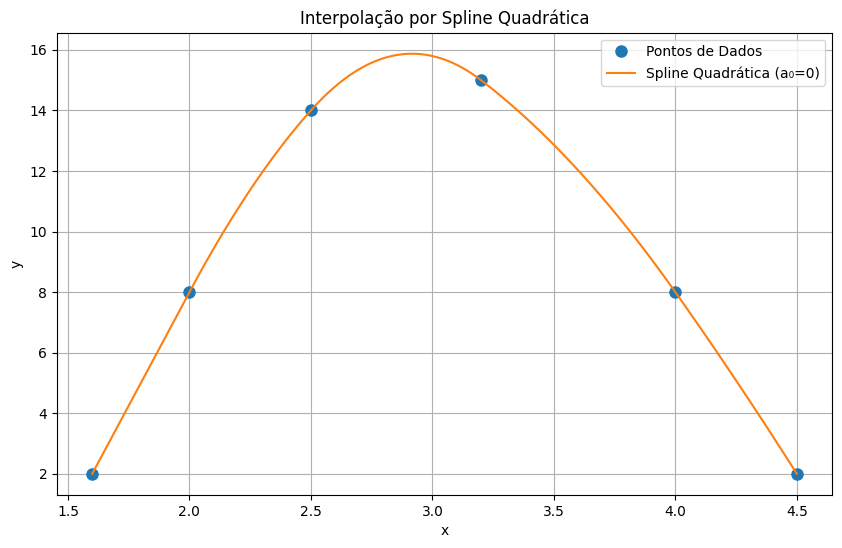

In [6]:
x_points = np.array([1.6, 2, 2.5, 3.2, 4, 4.5])
y_points = np.array([2, 8, 14, 15, 8, 2])

coeffs = quadratic_spline_coeffs(x_points, y_points)

if coeffs is not None:
    print("Coeficientes (a, b, c) calculados para cada segmento:")
    for i, (a, b, c) in enumerate(coeffs):
        print(f"Segmento {i} ([{x_points[i]}, {x_points[i+1]}]) \t: S(x) = {a:7.4f}x² + {b:7.4f}x + {c:7.4f}")

    x_fine = np.linspace(min(x_points), max(x_points), 500)
    y_fine = [evaluate_quadratic_spline(x_points, coeffs, x) for x in x_fine]

    plt.figure(figsize=(10, 6))
    plt.plot(x_points, y_points, 'o', markersize=8, label='Pontos de Dados')
    plt.plot(x_fine, y_fine, '-', label='Spline Quadrática (a₀=0)')
    plt.title('Interpolação por Spline Quadrática')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

(b)Obter e plotar o gráfico da spline cúbica que passa pelos pontos dados;

# Implementação Spline Cúbica

In [7]:
def cubic_spline_coeffs(x, y):
    n = len(x) - 1
    h = np.diff(x)

    # Monta matriz A e vetor b
    A = np.zeros((n-1, n-1))
    bvec = np.zeros(n-1)
    for i in range(1, n):
        A[i-1, i-1] = (h[i-1] + h[i]) / 3
        if i-1 > 0:
            A[i-1, i-2] = h[i-1] / 6
        if i < n-1:
            A[i-1, i] = h[i] / 6
        bvec[i-1] = ( (y[i+1]-y[i])/h[i] ) - ( (y[i]-y[i-1])/h[i-1] )

    # Resolve usando eliminação de Gauss
    M_internal = gauss_np(A, bvec)

    # Monta vetor completo M
    M = np.zeros(n+1)
    M[1:n] = M_internal
    return M

In [8]:
def evaluate_cubic_spline(x_val, x, y, M):
    for i in range(len(x)-1):
        if x[i] <= x_val <= x[i+1]:
            h = x[i+1] - x[i]
            term1 = (M[i] * (x[i+1]-x_val)**3) / (6*h)
            term2 = (M[i+1] * (x_val-x[i])**3) / (6*h)
            term3 = (y[i]/h - M[i]*h/6) * (x[i+1]-x_val)
            term4 = (y[i+1]/h - M[i+1]*h/6) * (x_val-x[i])
            return term1 + term2 + term3 + term4
    return None

In [9]:
def print_segment_polynomials(x_pts, y_pts, M):
    n = len(x_pts) - 1
    for i in range(n):
        h = x_pts[i+1] - x_pts[i]
        xi, xi1 = x_pts[i], x_pts[i+1]
        yi, yi1 = y_pts[i], y_pts[i+1]
        Mi, Mi1 = M[i], M[i+1]

        # Expandindo a forma cúbica em ax^3 + bx^2 + cx + d
        a1 = -Mi/(6*h)
        b1 = 3*Mi*xi1/(6*h)
        c1 = -3*Mi*xi1**2/(6*h)
        d1 = Mi*xi1**3/(6*h)

        a2 = Mi1/(6*h)
        b2 = -3*Mi1*xi/(6*h)
        c2 = 3*Mi1*xi**2/(6*h)
        d2 = -Mi1*xi**3/(6*h)

        K1 = (yi/h - Mi*h/6)
        K2 = (yi1/h - Mi1*h/6)
        a3, b3, c3, d3 = 0, -K1, K1*xi1, 0
        a4, b4, c4, d4 = 0, K2, -K2*xi, 0

        # Coeficientes finais
        A = a1+a2+a3+a4
        B = b1+b2+b3+b4
        C = c1+c2+c3+c4
        D = d1+d2+d3+d4

        print(f"S_{i}(x) = {A:.4f}x^3 + {B:.4f}x^2 + {C:.4f}x + {D:.4f}")


Funções do spline cúbico:
S_0(x) = -1.6982x^3 + 23.4228x^2 + -35.4765x + 6.9556
S_1(x) = -5.7508x^3 + 45.9047x^2 + -78.5452x + 35.6477
S_2(x) = 1.6075x^3 + -22.0790x^2 + 105.0641x + -112.1702
S_3(x) = 2.4087x^3 + -40.7034x^2 + 175.9591x + -173.7737
S_4(x) = 1.0050x^3 + -25.8182x^2 + 118.1818x + -91.5769


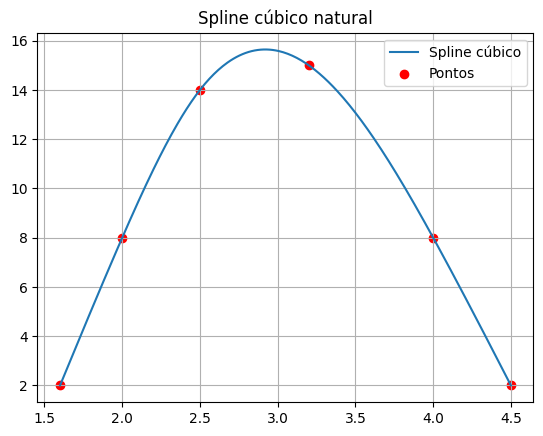

In [10]:
x_pts = np.array([1.6, 2.0, 2.5, 3.2, 4.0, 4.5])
y_pts = np.array([2, 8, 14, 15, 8, 2])

M = cubic_spline_coeffs(x_pts, y_pts)

# Print das funções de cada intervalo
print("Funções do spline cúbico:")
print_segment_polynomials(x_pts, y_pts, M)

# Gráfico
x_vals = np.linspace(1.6, 4.5, 300)
y_vals = [evaluate_cubic_spline(val, x_pts, y_pts, M) for val in x_vals]

plt.plot(x_vals, y_vals, label='Spline cúbico')
plt.scatter(x_pts, y_pts, color='red', label='Pontos')
plt.legend()
plt.grid(True)
plt.title("Spline cúbico natural")
plt.show()

(c)Estimar o valor de f(2,8) pelos dois métodos referidos acima.

Estimativa f(2.8) pela spline quadrática: 15.7265


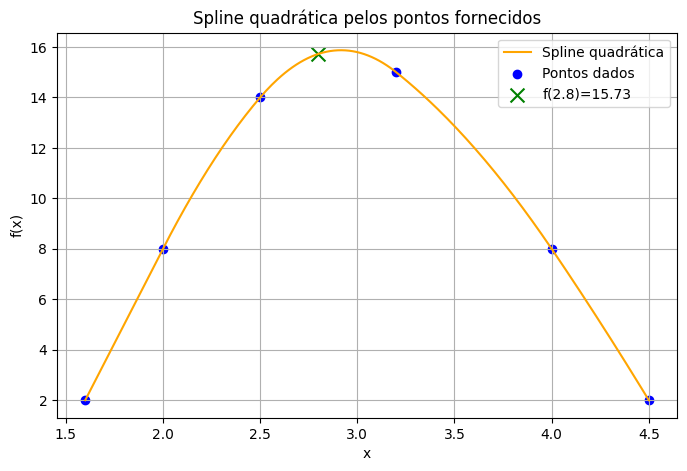

In [11]:
# Dados fornecidos
x_pts = np.array([1.6, 2.0, 2.5, 3.2, 4.0, 4.5])
y_pts = np.array([2, 8, 14, 15, 8, 2])

# Calcular coeficientes da spline quadrática
coeffs_quad = quadratic_spline_coeffs(x_pts, y_pts)

# Estimar f(2.8)
x_val = 2.8
y_quad = evaluate_quadratic_spline(x_pts, coeffs_quad, x_val)
print(f"Estimativa f(2.8) pela spline quadrática: {y_quad:.4f}")

# Gerar pontos para plotagem
x_dense = np.linspace(x_pts[0], x_pts[-1], 300)
y_dense_quad = [evaluate_quadratic_spline(x_pts, coeffs_quad, xx) for xx in x_dense]

# Plotar gráfico
plt.figure(figsize=(8,5))
plt.plot(x_dense, y_dense_quad, label='Spline quadrática', color='orange')
plt.scatter(x_pts, y_pts, color='blue', label='Pontos dados')
plt.scatter([x_val], [y_quad], color='green', marker='x', s=100,
            label=f'f(2.8)={y_quad:.2f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Spline quadrática pelos pontos fornecidos')
plt.legend()
plt.grid(True)
plt.show()

Valor estimado de f(2.8) pelo spline cúbico: 15.5154


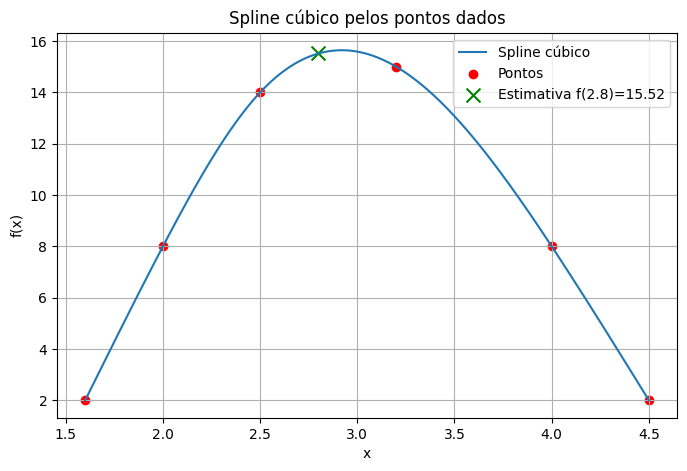

In [12]:
x_pts = np.array([1.6, 2.0, 2.5, 3.2, 4.0, 4.5])
y_pts = np.array([2, 8, 14, 15, 8, 2])

# Calcular os coeficientes do spline cúbico
M = cubic_spline_coeffs(x_pts, y_pts)

# Estimar f(2.8)
x_val = 2.8
y_est = evaluate_cubic_spline(x_val, x_pts, y_pts, M)
print(f"Valor estimado de f(2.8) pelo spline cúbico: {y_est:.4f}")

# Plotar o spline cúbico
x_dense = np.linspace(1.6, 4.5, 300)
y_dense = [evaluate_cubic_spline(xx, x_pts, y_pts, M) for xx in x_dense]

plt.figure(figsize=(8,5))
plt.plot(x_dense, y_dense, label='Spline cúbico')
plt.scatter(x_pts, y_pts, color='red', label='Pontos')
plt.scatter([x_val], [y_est], color='green', marker='x', s=100,
            label=f'Estimativa f(2.8)={y_est:.2f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Spline cúbico pelos pontos dados')
plt.legend()
plt.grid(True)
plt.show()

### 2) Use  interpolação  por  spline  cúbica  para  a  representação  dos  dados  abaixo,  e determine o valor de 𝑥que corresponde a 𝑓(𝑥)=0,23 para os seguintes dados tabulados através da solução de um problema de raiz do correspondente polinômio cúbico.

![Questão 2](../3-imagens/questao2.png)

Funções do spline cúbico:
S_0(x) = 0.0204x^3 + -0.3098x^2 + 1.1196x + -0.1632
S_1(x) = -0.0180x^3 + 0.1580x^2 + -0.4063x + 1.2403
S_2(x) = 0.0005x^3 + -0.0499x^2 + 0.4108x + 0.1122
S_3(x) = -0.0012x^3 + -0.0060x^2 + 0.1738x + 0.4186
S_4(x) = -0.0018x^3 + 0.0147x^2 + 0.0388x + 0.6039


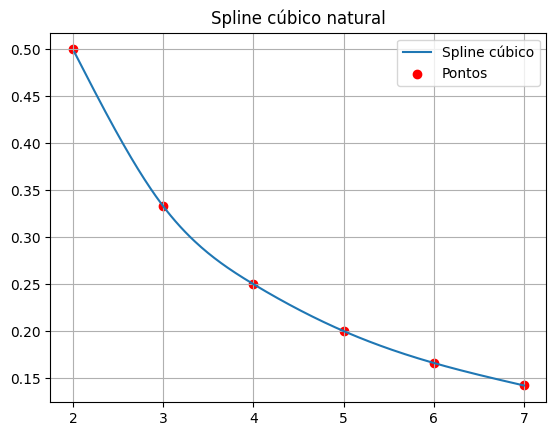

In [13]:
x_pts = np.array([2, 3, 4, 5, 6, 7])
y_pts = np.array([0.5, 0.333, 0.25, 0.2, 0.166, 0.142])

M = cubic_spline_coeffs(x_pts, y_pts)

print("Funções do spline cúbico:")
print_segment_polynomials(x_pts, y_pts, M)

x_vals = np.linspace(1.6, 7, 300)
y_vals = [evaluate_cubic_spline(val, x_pts, y_pts, M) for val in x_vals]

plt.plot(x_vals, y_vals, label='Spline cúbico')
plt.scatter(x_pts, y_pts, color='red', label='Pontos')
plt.legend()
plt.grid(True)
plt.title("Spline cúbico natural")
plt.show()

In [14]:
def fx(x_val):
  return evaluate_cubic_spline(x_val, x_pts, y_pts, M) - 0.23

def bisseccao(a,b,tolerancia,maximo):
    x_anterior = a
    x_atual = (b+a)/2
    count_atual = 1

    fxa = fx(a)
    fxb = fx(b)
    fx_atual = fx(x_atual)

    erro = np.abs((x_atual - a) / x_atual)


    if fx_atual * fxa < 0:
        b = x_atual
    else:
        if fx_atual * fxb < 0:
            a = x_atual
        else:
            if x_atual == 0:
                return x_atual, erro
            else:
                print ("erro")
                return None

    while erro > tolerancia and count_atual < maximo:
        x_anterior = x_atual
        fxa = fx(a)
        fxb = fx(b)
        x_atual = (b + a ) / 2

        fx_atual = fx(x_atual)
        erro = np.abs((x_atual - x_anterior) / x_atual)

        if fx_atual*fxa < 0:
            b = x_atual
        else:
            a = x_atual
        count_atual += 1
    return x_atual,erro


[Sol, erro] = bisseccao(4,5,0.001, 20)


print(Sol)
print(erro)

4.36328125
0.0008952551477170994


### 3) Efetue  o downloaddo datasetShampoo Sales  Dataset1,  no  ambiente  Python,o qual descreve o número de vendas mensais de shampoo longo de um período de três anos,e utilizando o processo de interpolação por spline cúbica, efetue o processo de up sampling para obter estimativas diárias de vendas.
https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv


In [15]:
"Month","Sales"
"1-01",266.0
"1-02",145.9
"1-03",183.1
"1-04",119.3
"1-05",180.3
"1-06",168.5
"1-07",231.8
"1-08",224.5
"1-09",192.8
"1-10",122.9
"1-11",336.5
"1-12",185.9
"2-01",194.3
"2-02",149.5
"2-03",210.1
"2-04",273.3
"2-05",191.4
"2-06",287.0
"2-07",226.0
"2-08",303.6
"2-09",289.9
"2-10",421.6
"2-11",264.5
"2-12",342.3
"3-01",339.7
"3-02",440.4
"3-03",315.9
"3-04",439.3
"3-05",401.3
"3-06",437.4
"3-07",575.5
"3-08",407.6
"3-09",682.0
"3-10",475.3
"3-11",581.3
"3-12",646.9

('3-12', 646.9)

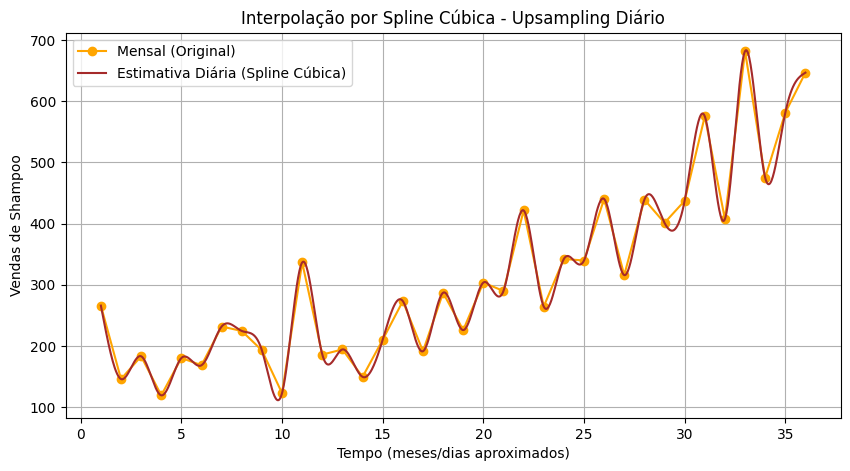


Tabela de estimativas diárias (todas):
   Dia  Vendas_estimadas
0    1        266.000000
1    2        260.409334
2    3        254.829379
3    4        249.270847
4    5        243.744450
5    6        238.260899
6    7        232.830907
7    8        227.465183
8    9        222.174441
9   10        216.969391
...
       Dia  Vendas_estimadas
1070  1071        639.835301
1071  1072        640.830341
1072  1073        641.751238
1073  1074        642.607259
1074  1075        643.407672
1075  1076        644.161746
1076  1077        644.878747
1077  1078        645.567945
1078  1079        646.238606
1079  1080        646.900000


In [16]:
sales = np.array([
    266.0, 145.9, 183.1, 119.3, 180.3, 168.5,
    231.8, 224.5, 192.8, 122.9, 336.5, 185.9,
    194.3, 149.5, 210.1, 273.3, 191.4, 287.0,
    226.0, 303.6, 289.9, 421.6, 264.5, 342.3,
    339.7, 440.4, 315.9, 439.3, 401.3, 437.4,
    575.5, 407.6, 682.0, 475.3, 581.3, 646.9
])
months = np.arange(1, len(sales) + 1)

M = cubic_spline_coeffs(months, sales)

days = np.linspace(1, len(sales), len(sales)*30)

daily_sales = [evaluate_cubic_spline(d, months, sales, M) for d in days]

plt.figure(figsize=(10, 5))
plt.plot(months, sales, 'o-', label='Mensal (Original)', color='orange')
plt.plot(days, daily_sales, '-', label='Estimativa Diária (Spline Cúbica)', color='brown')
plt.xlabel('Tempo (meses/dias aproximados)')
plt.ylabel('Vendas de Shampoo')
plt.title('Interpolação por Spline Cúbica - Upsampling Diário')
plt.legend()
plt.grid(True)
plt.show()

n_total_dias = len(daily_sales)
dias = np.arange(1, n_total_dias + 1)

tabela = pd.DataFrame({
    'Dia': dias,
    'Vendas_estimadas': daily_sales
})

print("\nTabela de estimativas diárias (todas):")
print(tabela.head(10))
print("...")
print(tabela.tail(10))